<a href="https://www.kaggle.com/code/pedro2318/pmr3508-2018-66f39f7a58-tarefa3?scriptVersionId=117504510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

EP3- PMR3508-2018-66f39f7a58 Regressão

FOI IMPORTADO INICIALMENTE AS BIBLIOTECAS QUE SE USARIAM E O ARQUIVO PARA TREINO DO CLASSIFICADOR.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))


['training_data.csv', 'sample_sub_1.csv', 'data.zip', 'train.csv', 'test.csv', 'test_features.csv']


In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
Xtrain = train.drop(columns=["Id","median_house_value"])
Ytrain = train["median_house_value"]


APÓS SEPARAR A TABELA DE TREINO EM X TENDO AS FEATURES DE INTERESSE E Y TENDO O VALOR DAS CASAS,
É FEITO UM ESTUDO PARA VER COMO ESTÁ A DISTRIBUIÇÃO DESSES PARÂMETROS.

In [3]:
Xtrain.describe()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.563050,35.625804,28.700028,2622.627284,535.628391,1413.978405,496.934109,38747.577450
std,2.008096,2.138690,12.587508,2145.423570,416.800426,1095.060629,376.873380,19091.513037
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,4999.000000
25%,-121.790000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,25596.500000
50%,-118.490000,34.250000,29.000000,2116.000000,432.000000,1160.000000,407.000000,35334.000000
75%,-118.000000,37.710000,37.000000,3131.250000,645.250000,1705.000000,602.000000,47500.000000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,150001.000000


FOI FEITO TAMBÉM UM ESTUDO ENTRE A CORRELAÇÃO ENTRE AS FEATURES.

In [4]:
tab = Xtrain.corr(method="spearman")
tab

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.880367,-0.148337,0.031614,0.054226,0.109208,0.048352,-0.011201
latitude,-0.880367,1.000000,0.037354,-0.013768,-0.050487,-0.113876,-0.067352,-0.091333
median_age,-0.148337,0.037354,1.000000,-0.352245,-0.304514,-0.280929,-0.278479,-0.152062
total_rooms,0.031614,-0.013768,-0.352245,1.000000,0.915508,0.813541,0.906453,0.269295
total_bedrooms,0.054226,-0.050487,-0.304514,0.915508,1.000000,0.869061,0.975306,-0.004290
population,0.109208,-0.113876,-0.280929,0.813541,0.869061,1.000000,0.902667,0.005630
households,0.048352,-0.067352,-0.278479,0.906453,0.975306,0.902667,1.000000,0.031215
median_income,-0.011201,-0.091333,-0.152062,0.269295,-0.004290,0.005630,0.031215,1.000000


FOI FEITO UM ESTUDO PARA VER COMO A DISTRIBUIÇÃO DAS CASAS DE ACORDO COM SUA LAT/LONG CAUSARIA UMA GRANDE INFLUENCIA.

In [5]:
POStrain = train[["latitude","longitude"]]


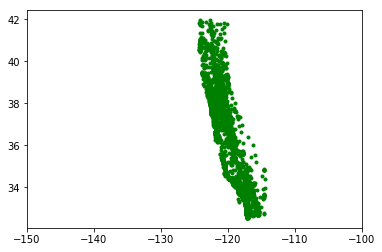

In [6]:
plt.subplots
plt.xlim(-150,-100)
plt.plot(train["longitude"],train["latitude"],"g.")
plt.show()


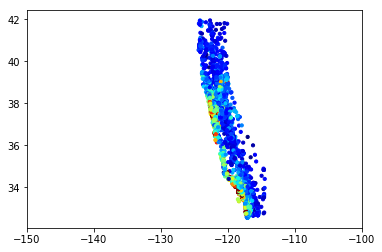

In [7]:
plt.subplots
plt.xlim(-150,-100)
plt.scatter(train["longitude"],train["latitude"], c= train["median_house_value"] , cmap = "jet" , s = 10)
plt.show()

CONCLUIU-SE QUE AS COLUNAS MAIS IMPORTANTES NA HORA DE AVALIAR AS CASAS COM ESSES DADOS SÃO AS FEATURES ABAIXO.
E COM ISSO COMEÇA-SE OS TESTES DOS CLASSIFICADORES.

In [8]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.neighbors import KNeighborsRegressor as knr

features = ["median_age", "total_rooms", "total_bedrooms", "median_income"]
Xnewtrain = train[features]

knn_scores = []
for i in range(1,100,5):
    knn = knr(n_neighbors = i)
    scores = cvs(knn, Xnewtrain, Ytrain, scoring='neg_mean_squared_error',
                cv = 5)
    knn_scores.append([i, -scores.mean()])
knn_scores = np.array(knn_scores)

In [9]:
knn_scores

array([[1.00000000e+00, 1.16890297e+10],
       [6.00000000e+00, 7.40512402e+09],
       [1.10000000e+01, 7.07237212e+09],
       [1.60000000e+01, 7.01553542e+09],
       [2.10000000e+01, 6.97789218e+09],
       [2.60000000e+01, 6.95171546e+09],
       [3.10000000e+01, 6.93164706e+09],
       [3.60000000e+01, 6.92482337e+09],
       [4.10000000e+01, 6.91899625e+09],
       [4.60000000e+01, 6.91018522e+09],
       [5.10000000e+01, 6.89897230e+09],
       [5.60000000e+01, 6.89236346e+09],
       [6.10000000e+01, 6.89196828e+09],
       [6.60000000e+01, 6.88703586e+09],
       [7.10000000e+01, 6.87910950e+09],
       [7.60000000e+01, 6.87690621e+09],
       [8.10000000e+01, 6.87944626e+09],
       [8.60000000e+01, 6.87947347e+09],
       [9.10000000e+01, 6.87800726e+09],
       [9.60000000e+01, 6.87528969e+09]])

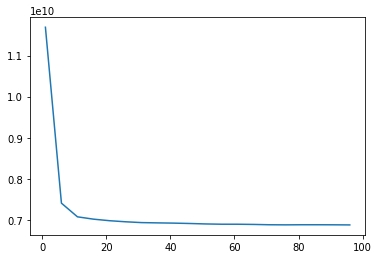

In [10]:
plt.plot(knn_scores[:,0], knn_scores[:,1])

In [11]:
knn_scores[np.where(knn_scores[:,1] == np.amin(knn_scores[:,1]))[0]]

array([[9.60000000e+01, 6.87528969e+09]])

In [12]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=1.0)
scores = cvs(r, Xnewtrain, Ytrain,
             scoring='neg_mean_squared_error',cv = 5)
print(-scores.mean())

6142626920.254656


In [13]:
from sklearn.linear_model import Lasso

l = Lasso(alpha=1.0)
scores = cvs(l, Xnewtrain, Ytrain,
             scoring='neg_mean_squared_error',cv = 5)
print(-scores.mean())

6142626921.121554


E ASSIM APLICA-SE O CLASSIFICADOR RIDGE NA PLANILHA DE TESTE

In [14]:
r = Ridge(alpha=1.0)

features = ["median_age", "total_rooms", "total_bedrooms", "median_income"]

Xtest = test[features]
ID_list = test.Id.tolist()

r.fit(Xnewtrain, Ytrain)
YPredict = r.predict(Xtest)

In [15]:
from sklearn.metrics import mean_squared_log_error
YPredict = pd.Series(YPredict)

In [16]:
for i in range(YPredict.shape[0]-1):
    if(YPredict[i] < 0):
        YPredict[i] = 0

In [17]:
YPredict.describe()

count      6192.000000
mean     206561.513131
std       85002.394461
min           0.000000
25%      151264.497781
50%      195886.793104
75%      246589.498767
max      789531.197921
dtype: float64

In [18]:
YPredict.head(10)

0    316364.731205
1    176141.972354
2    149913.456523
3    116110.301341
4    199947.932532
5    212795.533273
6    215176.302961
7    173599.677288
8     98797.099758
9    189297.560372
dtype: float64

In [19]:
pd.DataFrame({"Id":ID_list,"median_house_value":YPredict}).to_csv("pred_R.csv",index=False)